<a href="https://colab.research.google.com/github/Murad-pitafi/Machine-Learning/blob/main/evaluation_metric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
evo = pd.read_csv('/content/drive/MyDrive/Classroom/AI3001- KRR - Fall 2023 A and B  - Muhammad Rafi/train.csv')

In [ ]:
evo.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
evo['churn'].value_counts()

0    3652
1     598
Name: churn, dtype: int64

In [ ]:
objects = []
for i in evo.columns:
  if evo[i].dtype == 'object':
    objects.append(i)

In [ ]:
print(objects)

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']


In [ ]:
evo.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for i in objects:
  evo[i] = label_encoder.fit_transform(evo[i])

In [ ]:
from sklearn.model_selection import train_test_split
x = evo.drop(['churn'], axis = 1)
y = evo['churn']
xtrain, xtest, ytrain , ytest = train_test_split(x,y, random_state=7, test_size=0.20)

In [ ]:

from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(xtrain, ytrain)


RandomForestClassifier()

In [ ]:
y_pred = model.predict(xtest)
conf_matrix = confusion_matrix(ytest, y_pred)


In [ ]:
f1 = f1_score(ytest, y_pred)

accuracy = accuracy_score(ytest, y_pred)

fpr, tpr, thresholds = roc_curve(ytest, y_pred)
roc_auc = auc(fpr, tpr)


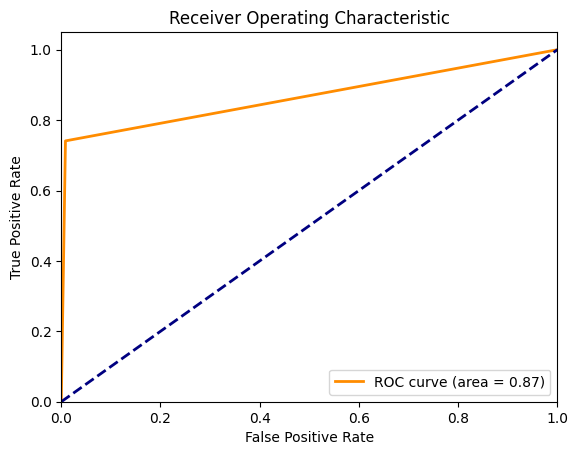

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [ ]:
print("Confusion Matrix:")
print(conf_matrix)
print("F1 Score:", f1)
print("Accuracy Score:", accuracy)


Confusion Matrix:
[[705   6]
 [ 36 103]]
F1 Score: 0.8306451612903225
Accuracy Score: 0.9505882352941176


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(ytest, y_pred).ravel()
print("tn ", tn, 'tp ', tp, 'fp ', fp, 'fn', fn)

tn  705 tp  103 fp  6 fn 36


<Axes: >

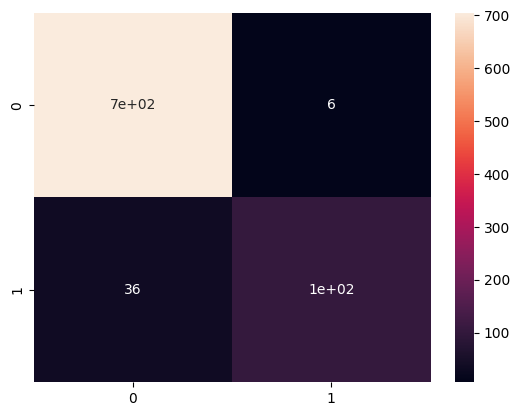

In [ ]:
import seaborn as sns
sns.heatmap(conf_matrix, annot = True)

In [ ]:
# @title task 2
data = pd.read_csv('/diabetes_prediction_dataset.csv')
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
for i in objects:
  data[i] = label_encoder.fit_transform(data[i])
data['gender'] = label_encoder.fit_transform(data['gender'])


In [ ]:
X = data.drop(['diabetes'], axis = 1)
y = data['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
objects = []
for i in data.columns:
  if data[i].dtype == 'object':
    objects.append(i)

In [ ]:

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)



KNeighborsClassifier()

In [ ]:

rf_predictions = rf_classifier.predict(X_test)
knn_predictions = knn_classifier.predict(X_test)


In [ ]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)


In [ ]:

print("Random Forest Classifier Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)


Random Forest Classifier Metrics:
Accuracy: 0.9703
Precision: 0.9456
Recall: 0.6920374707259953
F1 Score: 0.7991886409736308


In [ ]:

knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)


In [ ]:
print("\nK-Nearest Neighbors Classifier Metrics:")
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1 Score:", knn_f1)



K-Nearest Neighbors Classifier Metrics:
Accuracy: 0.9525
Precision: 0.8715686274509804
Recall: 0.5204918032786885
F1 Score: 0.6517595307917888


In [ ]:
#  Calculate the average precision across all folds.
#  Ensure that the positive class is preserved in each fold.
#  Compare the result of mean Validation score with Train Test Split using Accuracy Score.
#  Plot ROC AUC Curve for RF with train test split and Cross Validation



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import make_scorer, precision_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold


In [ ]:


# Define the scoring function for precision
precision_scorer = make_scorer(precision_score, pos_label=1)

# Create a 10-fold stratified cross-validator
stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store precision scores
knn_precision_scores = []
rf_precision_scores = []
print(X.shape)
print(y.shape)

(100000, 8)
(100000,)


In [ ]:
# Perform stratified cross-validation for KNN and RF
for train_index, test_index in stratified_cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn_classifier.fit(X_train, y_train)
    rf_classifier.fit(X_train, y_train)

    knn_predictions = knn_classifier.predict(X_test)
    rf_predictions = rf_classifier.predict(X_test)

    knn_precision = precision_score(y_test, knn_predictions)
    rf_precision = precision_score(y_test, rf_predictions)

    knn_precision_scores.append(knn_precision)
    rf_precision_scores.append(rf_precision)


In [ ]:
avg_knn_precision = np.mean(knn_precision_scores)
avg_rf_precision = np.mean(rf_precision_scores)

# Split the data into training and testing sets for comparison with accuracy score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
knn_train_predictions = knn_classifier.predict(X_train)
rf_train_predictions = rf_classifier.predict(X_train)

knn_test_predictions = knn_classifier.predict(X_test)
rf_test_predictions = rf_classifier.predict(X_test)

knn_train_accuracy = accuracy_score(y_train, knn_train_predictions)
knn_test_accuracy = accuracy_score(y_test, knn_test_predictions)

rf_train_accuracy = accuracy_score(y_train, rf_train_predictions)
rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)


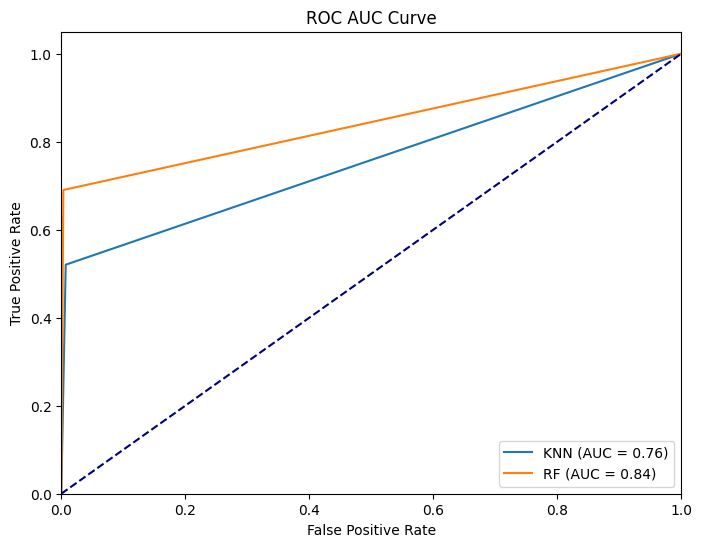

In [ ]:
 # Calculate ROC AUC for train-test split
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_test_predictions)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_test_predictions)

knn_roc_auc = roc_auc_score(y_test, knn_test_predictions)
rf_roc_auc = roc_auc_score(y_test, rf_test_predictions)

# Plot ROC AUC Curve
plt.figure(figsize=(8, 6))
plt.plot(knn_fpr, knn_tpr, label='KNN (AUC = {:.2f})'.format(knn_roc_auc))
plt.plot(rf_fpr, rf_tpr, label='RF (AUC = {:.2f})'.format(rf_roc_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()
